Reference:\
Adapted from the companion notebooks for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) by Francois Chollet.


# Working with Keras: A deep dive

In [ ]:
# import libs
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## A spectrum of workflows

## Different ways to build Keras models

### The Sequential model

**The `Sequential` class**

In [ ]:
# Clear the current TensorFlow graph
tf.keras.backend.clear_session()

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**Incrementally building a Sequential model**

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

**TO DO:**\
Question: Why are there "?"s for output shape?\
Answer: ?

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Calling a model for the first time to build it**

In [ ]:
model.build(input_shape=(None, 3))
model.weights

[<KerasVariable shape=(3, 64), dtype=float32, path=sequential_1/dense_2/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential_1/dense_2/bias>,
 <KerasVariable shape=(64, 10), dtype=float32, path=sequential_1/dense_3/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_3/bias>]

In [ ]:
model.layers

[<Dense name=dense_2, built=True>, <Dense name=dense_3, built=True>]

**TO DO:**
1. Print out all the model layers
2. Print out all the model weight specs

In [ ]:
# Print out all the model layers
FILL IN

# Print out all the model weight specs
FILL IN

<Dense name=dense_2, built=True>
<Dense name=dense_3, built=True>
<KerasVariable shape=(3, 64), dtype=float32, path=sequential_1/dense_2/kernel>
<KerasVariable shape=(64,), dtype=float32, path=sequential_1/dense_2/bias>
<KerasVariable shape=(64, 10), dtype=float32, path=sequential_1/dense_3/kernel>
<KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_3/bias>


**The summary method**

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

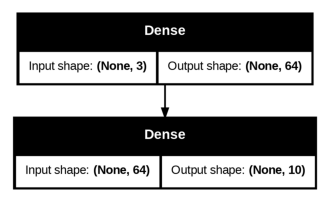

In [ ]:
# Draw the model architecture (graph)
keras.utils.plot_model(model, "seq_model.png", show_shapes=True)

# Load and display the generated image, scaled down
img = mpimg.imread('seq_model.png')
plt.figure(figsize=(4, 3)) # Adjust figure size as needed
plt.imshow(img)
plt.axis('off')
plt.show()

**Naming models and layers with the `name` argument**

**TO DO:**
1. Give a name to the model
2. Give a name to the 1st layer
3. Give a name to the 2nd layer

In [ ]:
model = keras.Sequential(**FILL IN**)
model.add(layers.Dense(64, activation="relu", **FILL IN**))
model.add(layers.Dense(10, activation="softmax", **FILL IN**))
model.build((None, 3))
model.summary()

Model: "my_seq_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ my_first_layer (Dense)               │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ my_last_layer (Dense)                │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

**Specifying the input shape of your model in advance**

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [ ]:
model.summary()

In [ ]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

### The Functional API

#### A simple example

**A simple Functional model with two `Dense` layers**

In [ ]:
# Clear the current TensorFlow graph
tf.keras.backend.clear_session()

**TO DO:**\
Convert the above Sequentially defined model to a Functional way of defining the model by filling in the missing parts

In [ ]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu", name="layer1")**FILL IN**
outputs = layers.Dense(10, activation="softmax", name="output")**FILL IN**
model_fnc = keras.Model(**FILL IN**)

In [ ]:
inputs.dtype

'float32'

In [ ]:
for feature in model_fnc.layers:
  print(feature)

<InputLayer name=my_input, built=True>
<Dense name=layer1, built=True>
<Dense name=output, built=True>


In [ ]:
model_fnc.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)                │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Multi-input, multi-output models

We will be building a model for a ticket classifier:

Use-Case:

Rank customer support tickets by priority and route them to the appropriate department

Inputs:
1. The title of the ticket (text input)
2. The text body of the ticket (text input)
3. Any tags added by the user (categorical input, assumed here to be one-hot encoded)

Outputs:
1. The priority score of the ticket, a scalar between 0 and 1 (sigmoid output)
2. The department that should handle the ticket (a softmax over the set of departments)



**A multi-input, multi-output Functional model**

In [ ]:
# Clear the current TensorFlow graph
tf.keras.backend.clear_session()

**TO DO:**\
FILL IN the missing parts below; make use of the description of the use-case above to understand the specs needed.

In [ ]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

# 3 Inputs
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = **FILL IN** # Fill in an appropriate keras input here
tags = keras.Input(shape=(num_tags,), name="tags")

# Features
features = layers.Concatenate()([**FILL IN**]) # Fill in what to concatenate at this level
features = layers.Dense(64, activation="relu")(**FILL IN**) # Fill in the appropriate input

# 2 Outputs
priority = layers.Dense(1, activation=**FILL IN**, name="priority")(features)
department = layers.Dense(
    **FILL IN**, activation=**FILL IN**, name="department")(features)

# model: inputs + outputs
model_multi = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [ ]:
model_multi.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ title (InputLayer)        │ (None, 10000)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_body (InputLayer)    │ (None, 10000)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ tags (InputLayer)         │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 20100)          │              0 │ title[0][0],           │
│                           │                        │                │ text_body[0][0],       │
│                           │                        │                │ tags[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │      1,286,464 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ priority (Dense)          │ (None, 1)              │             65 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ department (Dense)        │ (None, 4)              │            260 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,286,789 (4.91 MB)

 Trainable params: 1,286,789 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

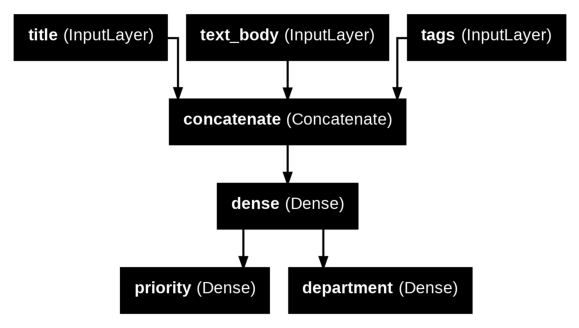

In [ ]:
keras.utils.plot_model(model_multi, "model_multi_model.png", show_layer_names=True)

# Load and display the generated image, scaled down
img = mpimg.imread('model_multi_model.png')
plt.figure(figsize=(8, 4)) # Adjust figure size as needed
plt.imshow(img)
plt.axis('off')
plt.show()

#### Training a multi-input, multi-output model

**Training a model by providing lists of input & target arrays**

In [ ]:
import numpy as np

num_samples = 1280

# generate inputs
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# generate outputs
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

In [ ]:
# Print the shape of the title data
print("shape: ", title_data.shape)

# Print the first 5 samples of the first 10 features of title_data
print("title_data:\n ", title_data[:5,:10])

shape:  (1280, 10000)
title_data:
  [[1 1 0 0 1 0 0 1 0 0]
 [0 1 0 1 0 0 1 1 1 1]
 [1 0 1 0 0 1 1 1 0 0]
 [1 1 1 0 0 0 1 0 1 1]
 [1 0 1 1 1 0 1 0 0 1]]


In [ ]:
print("shape: ", tags_data.shape)
print("tags_data:\n ", tags_data[:5,:10])

shape:  (1280, 100)
tags_data:
  [[1 0 1 0 0 0 0 1 0 1]
 [1 0 1 1 0 1 0 1 1 1]
 [0 0 1 0 1 0 0 1 1 0]
 [1 1 1 1 0 0 0 1 0 1]
 [1 0 1 1 1 0 0 1 1 1]]


In [ ]:
# compile
model_multi.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
# fit
model_multi.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
# eval
model_multi.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])

# predict
priority_preds, department_preds = model_multi.predict([title_data, text_body_data, tags_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - department_accuracy: 0.2364 - loss: 1083.0068 - priority_mean_absolute_error: 0.5112
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - department_accuracy: 0.5569 - loss: 1052.6537 - priority_mean_absolute_error: 0.5139
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


**Training a model by providing dicts of input & target arrays**

In [ ]:
model_multi.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})

model_multi.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)

model_multi.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})

priority_preds, department_preds = model_multi.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

#### The power of the Functional API: Access to layer connectivity

**Retrieving the inputs or outputs of a layer in a Functional model**

In [ ]:
model_multi.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

In [ ]:
model_multi.layers[3].input

[<KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=title>,
 <KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=text_body>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=None, name=tags>]

In [ ]:
model_multi.layers[3].output

<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, name=keras_tensor>

**Creating a new model by reusing intermediate layer outputs**

**TO DO:**\
Reuse our previously built model and add a new 3rd output:

*   Create a new Dense layer with 3 neurons with softmax called "difficulty"
*   FILL IN the missing parts below

Our model should now have 3 outputs: priority, department, difficulty; the latter meaning the difficulty of solving a ticket.

In [ ]:
features = **FIL IN**.output # Reuse the previously built model layers as appropriate
difficulty = layers.**FILL IN**(**FILL IN**)(**FILL IN**) # Add a new layer "difficulty"

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, **FILL IN**])

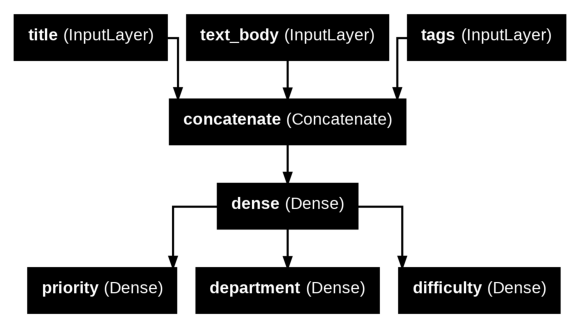

In [ ]:
keras.utils.plot_model(new_model, "updated_model_multi.png", show_layer_names=True)

# Load and display the generated image, scaled down
img = mpimg.imread('updated_model_multi.png')
plt.figure(figsize=(8, 4)) # Adjust figure size as needed
plt.imshow(img)
plt.axis('off')
plt.show()